In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import pandas as pd
import zipfile 
import urllib
import os
import geopandas as gpd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Part 1: Data Cleaning

In [2]:
!for ((y=94; y<=99; y+=1)); do wget \
https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV//zbp$y\totals.zip; done

!for ((y=0; y<=1; y+=1)); do wget \
https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV//zbp0$y\totals.zip; done

!for ((y=2; y<=9; y+=1)); do wget \
https://www2.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

!for ((y=10; y<=14; y+=1)); do wget \
https://www2.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done

--2017-12-12 16:07:02--  https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV//zbp94totals.zip
Resolving www2.census.gov... 104.88.75.220, 2600:141b:13:288::208c, 2600:141b:13:295::208c
Connecting to www2.census.gov|104.88.75.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 611524 (597K) [application/zip]
Saving to: “zbp94totals.zip”

100%[======================================>] 611,524     --.-K/s   in 0.01s   

2017-12-12 16:07:03 (39.5 MB/s) - “zbp94totals.zip” saved [611524/611524]

--2017-12-12 16:07:03--  https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV//zbp95totals.zip
Resolving www2.census.gov... 104.88.75.220, 2600:141b:13:295::208c, 2600:141b:13:288::208c
Connecting to www2.census.gov|104.88.75.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625328 (611K) [application/zip]
Saving to: “zbp95totals.zip”

100%[======================================>] 625,328     --.-K/s   in 0.03s   

2017-12-12 16:07:03 (22.9 MB/s)

--2017-12-12 16:07:06--  https://www2.census.gov/econ2010/CBP_CSV/zbp10totals.zip
Resolving www2.census.gov... 104.88.75.220, 2600:141b:13:288::208c, 2600:141b:13:295::208c
Connecting to www2.census.gov|104.88.75.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 797534 (779K) [application/zip]
Saving to: “zbp10totals.zip”

100%[======================================>] 797,534     --.-K/s   in 0.02s   

2017-12-12 16:07:06 (31.5 MB/s) - “zbp10totals.zip” saved [797534/797534]

--2017-12-12 16:07:06--  https://www2.census.gov/econ2011/CBP_CSV/zbp11totals.zip
Resolving www2.census.gov... 104.88.75.220, 2600:141b:13:288::208c, 2600:141b:13:295::208c
Connecting to www2.census.gov|104.88.75.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 795390 (777K) [application/zip]
Saving to: “zbp11totals.zip”

100%[======================================>] 795,390     --.-K/s   in 0.03s   

2017-12-12 16:07:06 (29.4 MB/s) - “zbp11totals.zip” saved

In [3]:
!wget https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip

--2017-12-12 16:07:07--  https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
Resolving data.cityofnewyork.us... 52.206.140.205
Connecting to data.cityofnewyork.us|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip [following]
--2017-12-12 16:07:08--  https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip
Connecting to data.cityofnewyork.us|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1514401 (1.4M) [application/octet-stream]
Saving to: “application%2Fzip”

100%[======================================>] 1,514,401   1.95M/s   in 0.7s    

2017-12-12 16:07:09 (1.95 MB/s) - “application%2Fzip” saved [1514401/1514401]



In [4]:
frames = []
for i in range(94,100):
    fname = 'zbp' + str(i) + "totals.zip"
    zf = zipfile.ZipFile(fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df.columns = [x.lower() for x in df.columns]
    df = df[df.zip.astype(str).str.startswith('1')]
    #df.zip = df.zip.apply(add_zeros)
    df.set_index('zip', inplace=True)
    df = df['est'].rename('19' + str(i))
    frames.append(df)

for i in range(0,15):
    fname = 'zbp' + str(i).zfill(2) + "totals.zip"
    zf = zipfile.ZipFile(fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df.columns = [x.lower() for x in df.columns]
    df = df[df.zip.astype(str).str.startswith('1')]
    #df.zip = df.zip.apply(add_zeros)
    df.set_index('zip', inplace=True)
    df = df['est'].rename('20' + str(i).zfill(2))
    frames.append(df)

In [5]:
df = pd.concat(frames, axis=1)
#del df.index.name

In [6]:
url = "https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip"
urllib.request.urlretrieve(url, 'nyc.zip')
os.system("unzip -d %s nyc.zip"%(os.getenv("PUIDATA")))

nycshp = gpd.GeoDataFrame.from_file((os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp"))

In [7]:
nycshp.ZIPCODE = nycshp.ZIPCODE.astype(int)

In [8]:
df["ZIPCODE"] = df.index

In [9]:
df = df.merge(nycshp, on="ZIPCODE")

In [10]:
df.set_index("ZIPCODE", inplace=True)

# Part 2: K-Means Clustering

In [11]:
cluster = df.ix[:,:21]

In [12]:
cluster = cluster.dropna()

In [13]:
for i in range(0,len(cluster.columns)):
    ts = np.asarray(cluster.ix[:,i])
    mean = ts.mean()
    std = ts.std()
    for j in range(0,len(ts)):
        ts[j] = (ts[j] - mean)/std
    cluster.ix[:,i] = ts

In [14]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

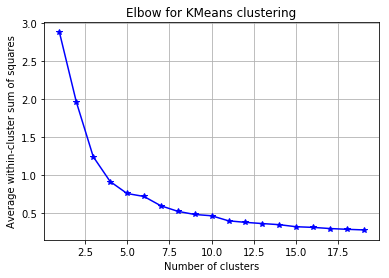

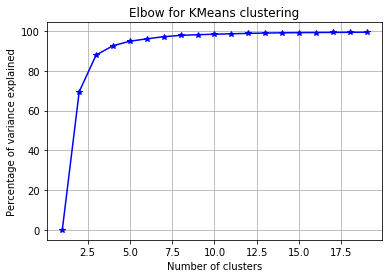

In [15]:
elbow(cluster,range(1,20))

Elbow curve suggest 3 clusters - % variance explained at 3 is ~ 85%, and same for 4: therefore 3 clusters makes sense.

In [16]:
clusterer = KMeans(n_clusters=3, random_state=324)
cluster_labels = clusterer.fit_predict(cluster)
cluster['cluster_labels'] = cluster_labels

In [17]:
cluster["ZIPCODE"] = cluster.index

In [18]:
df = df.join(cluster.cluster_labels)

In [19]:
df = gpd.GeoDataFrame(df)

Text(0.5,1,'Clusters: K Means')

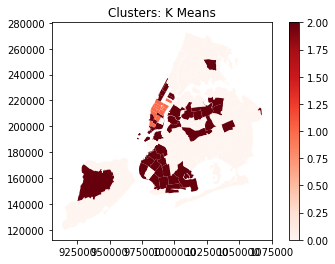

In [20]:
df.plot(column='cluster_labels', cmap='Reds', legend=True)
plt.title("Clusters: K Means")

This is a plot of 3 clusters created using K-means. The scale is the zip code level, and the clustering is by # of businesses. One cluster is in midtown manhattan (the red), another on the outskirts of the 5 boroughs (the light pink), and a third in between (the dark red).

In [21]:
cluster_label_group = df.groupby("cluster_labels").mean()

In [22]:
cluster_label_group.ix[:,0:21]

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
cluster_labels,,,,,,,,,,,,,,,,,,,,,
0.0,341.055814,346.162791,351.697674,359.744186,364.432558,367.795349,371.865116,371.158140,384.906977,391.734884,...,400.353488,402.311628,407.906977,412.688372,419.339535,428.753488,435.911628,445.786047,457.013953,466.162791
1.0,5317.000000,5455.909091,5461.818182,5577.727273,5616.181818,5600.545455,5690.454545,5695.272727,5487.363636,5475.818182,...,5581.363636,5618.909091,5510.363636,5483.181818,5387.727273,5358.363636,5345.909091,5360.272727,5387.909091,5404.454545
2.0,1388.192982,1413.526316,1437.368421,1482.157895,1506.807018,1538.350877,1581.245614,1580.263158,1615.035088,1638.701754,...,1682.087719,1701.228070,1727.385965,1742.456140,1756.894737,1792.245614,1819.157895,1859.596491,1900.894737,1947.350877


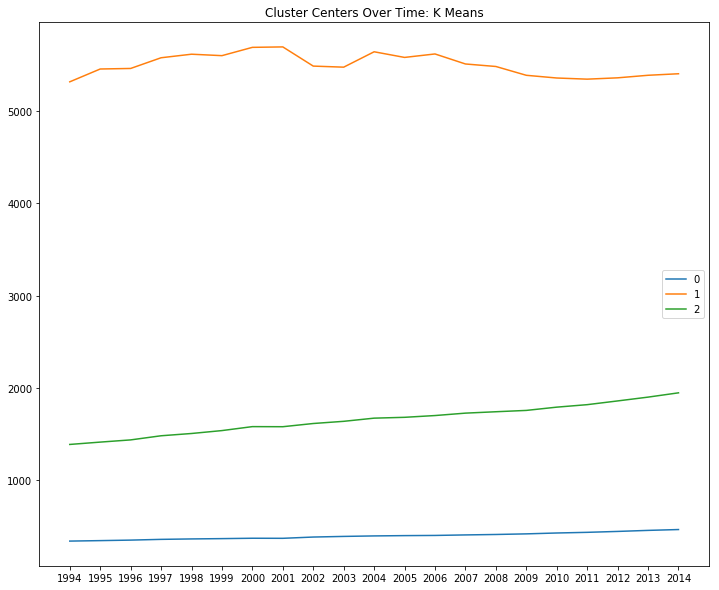

In [23]:
plt.figure(figsize=(12,10))
plt.plot(cluster_label_group.ix[:,0:21].T)
plt.title("Cluster Centers Over Time: K Means")
plt.legend([0,1,2])

# Part 3: Clustering Using Gaussian Mixture

In [24]:
from sklearn import mixture

In [25]:
g = mixture.GMM(n_components=3)
g.fit(cluster)

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

In [26]:
cluster_labels = g.predict(cluster)

In [27]:
cluster["Cluster_Labels_GaussianMixture"] = cluster_labels

In [28]:
df = df.join(cluster.Cluster_Labels_GaussianMixture)

Text(0.5,1,'Clusters: Gaussian Mixture')

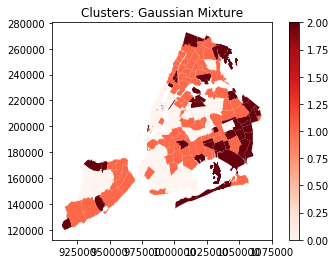

In [29]:
df.plot(column = "Cluster_Labels_GaussianMixture", cmap = "Reds", legend = True)
plt.title("Clusters: Gaussian Mixture")

This is a plot of 3 clusters created using the gaussian mixture method. The scale is the zip code level, and the clustering is by # of businesses. One cluster is in midtown manhattan and inner parts of queens and brooklyn and staten island (the red), another on the outskirts of the 5 boroughs (the dark red), and a third in between (the light pink).

In [30]:
cluster_label_group_1 = df.groupby("Cluster_Labels_GaussianMixture").mean()

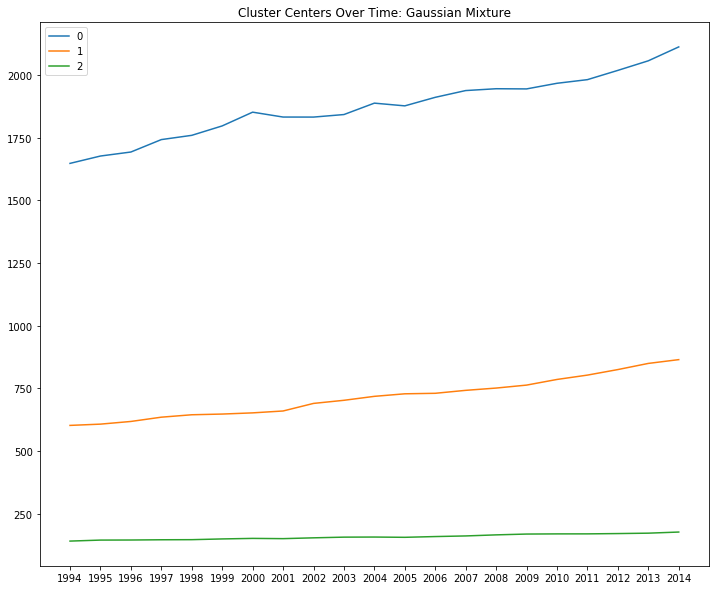

In [31]:
plt.figure(figsize=(12,10))
plt.plot(cluster_label_group_1.ix[:,0:21].T)
plt.title("Cluster Centers Over Time: Gaussian Mixture")
plt.legend([0,1,2])

# Comparing the 2 Clusters + Some Interpretation

**Cluster Comparison**

While the time series plots have similar shapes, their scales are quite different. Nonetheless, given that the features in the cluster are different, it is perhaps this slope that makes them similar.

**Interpretation**

One cluster is of zip codes in midtown manhattan, and its parallel cluster includes midtown manhattan and other zip codes in inner parts of the borough. These clusters are seeing the largest number of businesses (and in one cluster the largest growth) since 1994.

One pair of clusters are those of zipcodes in outer parts of NYC. They have the smallest number of businesses and the smallest rate of growth.

The final pair of clusters are somewhere in between the inner and outer parts of NYC. They have an average number of businesses somewhere in the middle of the aformentioned two clusters, and depending on the cluster method a growth rate either in the middle or the highest of the three clusters.

Points: 10